# Assignment 1

First we need to import a few modules, execute the cell below:

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [5]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return(numpy.cos(x))

You can use the following cell to check that your code works for scalar arguments:

In [6]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [7]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [8]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return(-numpy.sin(x))

In [9]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [10]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [11]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    a=(f(x)-f(x-dx))/dx
    return(a)


In [12]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


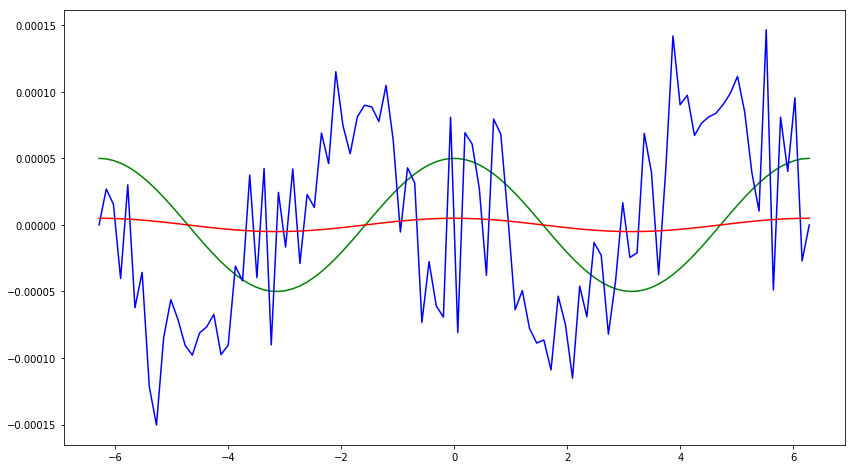

In [14]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-12)
df_dx_3 = backward_difference(f, xs, dx=1e-5)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(14, 8))
line_1, = plt.plot(xs, df_dx_1 - df_dx_analytical, 'green', label= '$\Delta$x = $10^{-4}$')
line_2, = plt.plot(xs, df_dx_2 - df_dx_analytical, 'blue', label= '$\Delta$x = $10^{-12}$')
line_3, = plt.plot(xs, df_dx_3 - df_dx_analytical, 'red', label= '$\Delta$x = $10^{-5}$')
plt.title('Difference between the analytical derivative and numerical \n implementation for a cos(x) graph using a backward difference method ')
plt.xlabel('x')
plt.ylabel('Difference between analytical and numerical derivative')
plt.legend(handles=[line_1, line_3, line_2])

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


The numerical method loses accuracy when delta x is too small due to the limitation in numerical precision. The computer stores numbers to a finite number of decimal places, and with a very small delta x the last decimal places are calculated deterministically, but not accurately. Calculations involving these numbers will therefore contain inaccuracies as slightly incorrect values are used. It does not matter that these are very small inaccuracies because they are of the same magnitude for the values involved in operations such as division. 
For a value of delta x too large, the backward difference considers two points on the function far apart which does not accuractely estimate the gradient and instead the average gradient over these two points is found.

